# Simple Recurrent neural network
(Forecasting For Sine wave data)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

## ----- Section 01 Importing/ Generating Data -----

### Generating and plotting the original data

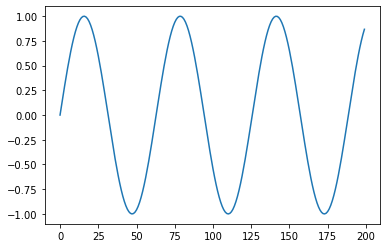

In [2]:
series = np.sin(0.1*np.arange(200))

# plot it
plt.plot(series)
plt.show()

### Building the dataset

In [3]:
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10, 1) Y.shape (190,)


## ----- Section 02 Training The Model -----

### Training autoregressive RNN model


In [4]:
input = Input(shape=(T, 1))
x = SimpleRNN(15, activation='relu')(input)
x = Dense(1)(x)
model = Model(input, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.001),
)

# train the RNN
history = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
3/3 [==============================] - 2s 278ms/step - loss: 0.4732 - val_loss: 0.3926
Epoch 2/80
3/3 [==============================] - 0s 28ms/step - loss: 0.4197 - val_loss: 0.3607
Epoch 3/80
3/3 [==============================] - 0s 28ms/step - loss: 0.4094 - val_loss: 0.3306
Epoch 4/80
3/3 [==============================] - 0s 26ms/step - loss: 0.3354 - val_loss: 0.3023
Epoch 5/80
3/3 [==============================] - 0s 25ms/step - loss: 0.3556 - val_loss: 0.2756
Epoch 6/80
3/3 [==============================] - 0s 24ms/step - loss: 0.3369 - val_loss: 0.2504
Epoch 7/80
3/3 [==============================] - 0s 25ms/step - loss: 0.2955 - val_loss: 0.2267
Epoch 8/80
3/3 [==============================] - 0s 30ms/step - loss: 0.2883 - val_loss: 0.2044
Epoch 9/80
3/3 [==============================] - 0s 28ms/step - loss: 0.2686 - val_loss: 0.1840
Epoch 10/80
3/3 [==============================] - 0s 27ms/step - loss: 0.2407 - val_loss: 0.1667
Epoch 11/80
3/3 [===========

### Plotting loss per iteration

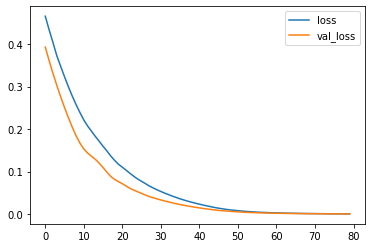

In [5]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

## ----- Section 03 Making Predictions -----

### "Wrong" forecast using true targets
#### This block will not return an error, but that does not mean we are correctly predicting the outcome. This block demonstrates the wrong way to forecast.

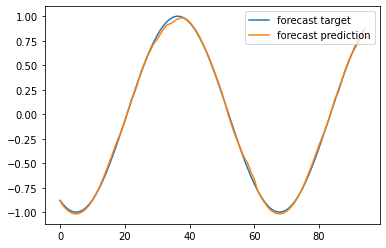

In [6]:
validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
  i += 1
  
  # update the predictions list
  validation_predictions.append(p)

# Plotting the forecast
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

### Right way to forecast

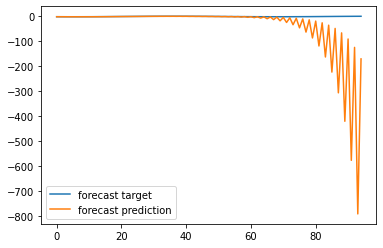

In [7]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

# Plotting the forecast
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

## ----- Section 04 Evaluating a model -----

In [8]:
print(model.summary())
print(history.history)
# Replace old series (in section 1) with the given noisy one for test. Then run the all cells again
# series = np.sin(0.1*np.arange(1000)) + np.random.randn(200)*0.1

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 1)]           0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 15)                255       
_________________________________________________________________
dense (Dense)                (None, 1)                 16        
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________
None
{'loss': [0.4652082622051239, 0.4330722689628601, 0.4032031297683716, 0.37202733755111694, 0.3472350239753723, 0.32275518774986267, 0.29929018020629883, 0.27749520540237427, 0.25724923610687256, 0.23865514993667603, 0.2212207168340683, 0.2069307416677475, 0.1948205977678299, 0.18247467279434204, 0.17114616930484772, 0.1593257039785385, 0.14834973216056824, 0.13646957278251648, 0.126160